In [23]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
from pathos.multiprocessing import ProcessPool
import errno
import dill
import sys
sys.path.append('../')

import neat
from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net

import itertools as it
import time
import imageio

import sgr_main as sgr
from matplotlib import pyplot as plt


from substrates import morph_substrate, control_substrate
from generate_robot import generate_robot

In [24]:
def get_robot(genome, params, neat_config):
    cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)

    design_substrate = morph_substrate(params)
    design_net = create_phenotype_network(cppn, design_substrate)

    robot = generate_robot(design_net, params)
    if not sgr.eval_genome_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)
    env = evogym.envs.gym.make(params["env"], body=robot, connections=connections)
    img = env.render(mode='img')
    env.close()
    return robot, img

In [52]:
ENV = "AreaMinimizer-v0" # env_names = ["CaveCrawler-v0", "UpStepper-v0", "ObstacleTraverser-v1"]
STEPS = 600
ROBOT_SIZE = 5
POP = 128

directory = "results/" + ENV

file = "run_1_population.pkl"
defaultGen = neat.DefaultGenome
f = lambda self, other, config: new_distance(params, morph_substrate(params), generate_robot, self, other, config)
defaultGen.distance = f
params = {"robot_size": ROBOT_SIZE, "env": ENV, "steps": STEPS, "pop_size": POP, "robot_substrate": "AA"}
neat_config = neat.config.Config(
    defaultGen,
    neat.reproduction.DefaultReproduction, 
    neat.species.DefaultSpeciesSet, 
    neat.stagnation.DefaultStagnation, 
    "../configs/hyperNEAT_config"
)

# file = "run_CPPN_1_population.pkl"
# params = {"robot_size": ROBOT_SIZE, "env": ENV, "steps": STEPS, "pop_size": POP, "robot_substrate": "CPPN"}
# neat_config = neat.config.Config(
#     neat.genome.DefaultGenome, 
#     neat.reproduction.DefaultReproduction, 
#     neat.species.DefaultSpeciesSet, 
#     neat.stagnation.DefaultStagnation, 
#     "../configs/hyperNEAT_config_CPPN_robot"
# )

with open(f"../{directory}/{file}", "rb") as file:
    pop = dill.load(file)
champion = pop.best_genome
print(champion.fitness)

0.6294496458119245


!!!!!!!!!!!!!!!!!!!!!!!! Specie  300 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  296 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  288 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  297 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  290 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  274 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  255 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  289 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  278 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  298 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  275 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  286 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  292 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  285 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  283 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! 

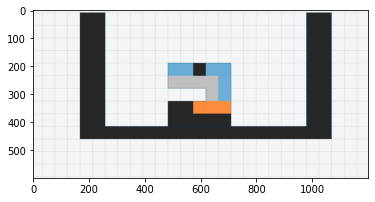

5519 0.32204629271622764


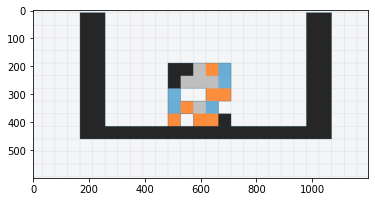

!!!!!!!!!!!!!!!!!!!!!!!! Specie  253 !!!!!!!!!!!!!!!!!!!!!!!!!!!
5765 0.33006065933195106


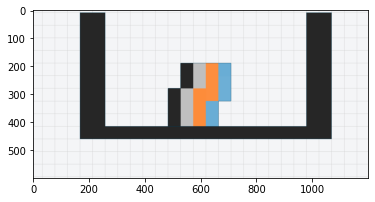

5645 0.31755553219713323


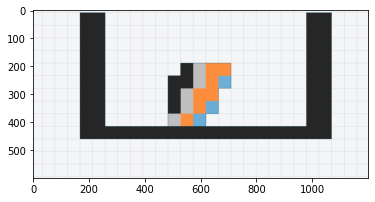

!!!!!!!!!!!!!!!!!!!!!!!! Specie  293 !!!!!!!!!!!!!!!!!!!!!!!!!!!
5711 0.39260039193034973


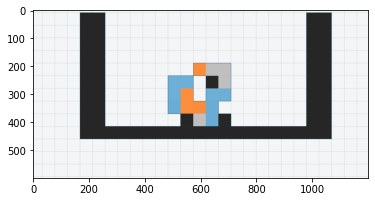

!!!!!!!!!!!!!!!!!!!!!!!! Specie  258 !!!!!!!!!!!!!!!!!!!!!!!!!!!
4855 0.4176624106465554


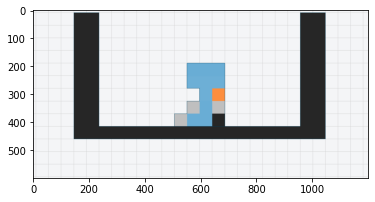

5537 0.45947826031339206


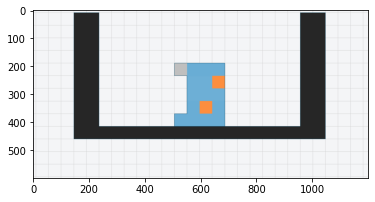

!!!!!!!!!!!!!!!!!!!!!!!! Specie  284 !!!!!!!!!!!!!!!!!!!!!!!!!!!
5592 0.5552020240138824


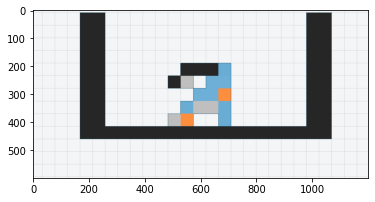

!!!!!!!!!!!!!!!!!!!!!!!! Specie  215 !!!!!!!!!!!!!!!!!!!!!!!!!!!
5264 0.5802865879046858


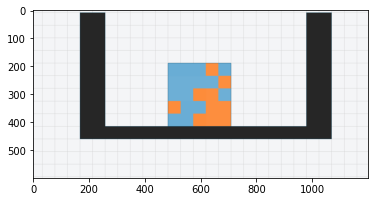

5860 0.310335397605071


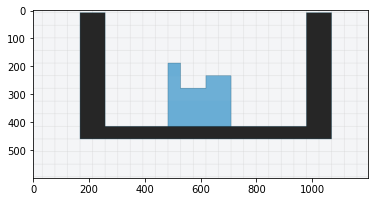

5882 0.4594539817623394


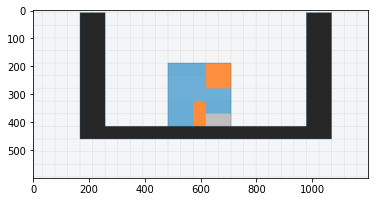

5885 0.4642038924843027


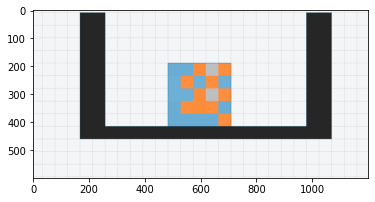

5595 0.5551744543416857


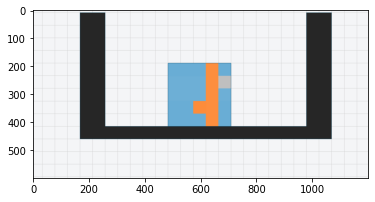

!!!!!!!!!!!!!!!!!!!!!!!! Specie  29 !!!!!!!!!!!!!!!!!!!!!!!!!!!
600 0.5877140095784893


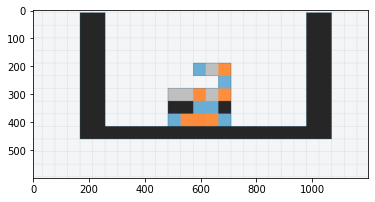

5801 0.5299896243804307


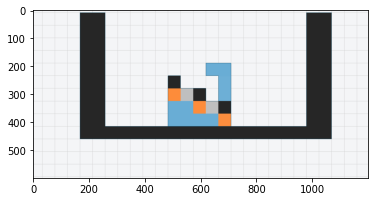

!!!!!!!!!!!!!!!!!!!!!!!! Specie  206 !!!!!!!!!!!!!!!!!!!!!!!!!!!
2607 0.5893033807046183


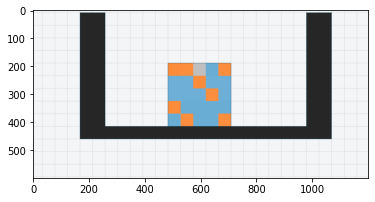

!!!!!!!!!!!!!!!!!!!!!!!! Specie  165 !!!!!!!!!!!!!!!!!!!!!!!!!!!
4925 0.5970301450202977


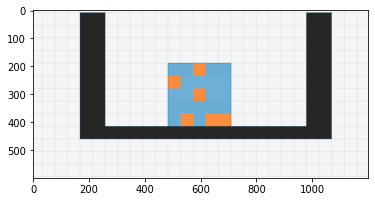

5710 0.5443418459306588


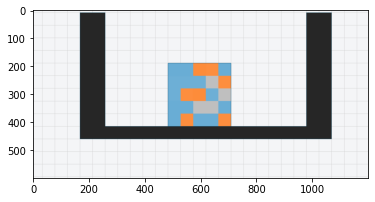

!!!!!!!!!!!!!!!!!!!!!!!! Specie  214 !!!!!!!!!!!!!!!!!!!!!!!!!!!
1808 0.6294496458119245


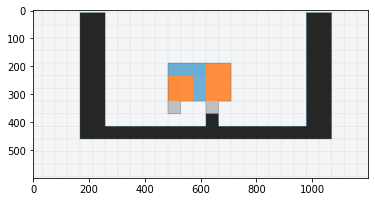

!!!!!!!!!!!!!!!!!!!!!!!! Specie  301 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  302 !!!!!!!!!!!!!!!!!!!!!!!!!!!


In [53]:
for k, v in pop.species.species.items():
    print("!!!!!!!!!!!!!!!!!!!!!!!! Specie ", k, "!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    for g in v.members.values():
        if g.fitness != None and g.fitness > .3:
            r, img = get_robot(g, params, neat_config)
            if img is not None:
                print(g.key, g.fitness)
                plt.imshow(img)
                plt.show()

In [54]:
g = champion
# g = pop.population[4778]
sgr.single_genome_fit(g, params, neat_config, True)

(0.6294496458119245, True)